#Importando DataSet

In [ ]:
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/ageron/handson-ml2/refs/heads/master/datasets/housing/housing.csv'

In [ ]:
df = pd.read_csv(url)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#Separando variáveis por tipo:

In [ ]:
var_quant_continua = ['median_income']
var_quant_discreta = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households']
var_qual_ord = ['ocean_proximity']
var_qual_nom = ['longitude', 'latitude']
var_target = ['median_house_value']

#Análise exploratória

##Dados nulos

In [ ]:
#Verificando quantidade de dados nulos:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
df.isnull().sum() / len(df) * 100

,0
longitude,0.000000
latitude,0.000000
housing_median_age,0.000000
total_rooms,0.000000
total_bedrooms,1.002907
population,0.000000
households,0.000000
median_income,0.000000
median_house_value,0.000000
ocean_proximity,0.000000


Há poucos dados nulos e por isso removeremos as linhas com dados nulos.

In [ ]:
#Removendo dados nulos:
df.dropna(inplace=True)

##Variáveis quantitativas contínuas

In [ ]:
#Análise estatística de variáveis quantitativas contínuas:
df[var_quant_continua].describe()

,median_income
count,20433.000000
mean,3.871162
std,1.899291
min,0.499900
25%,2.563700
50%,3.536500
75%,4.744000
max,15.000100


###Histograma

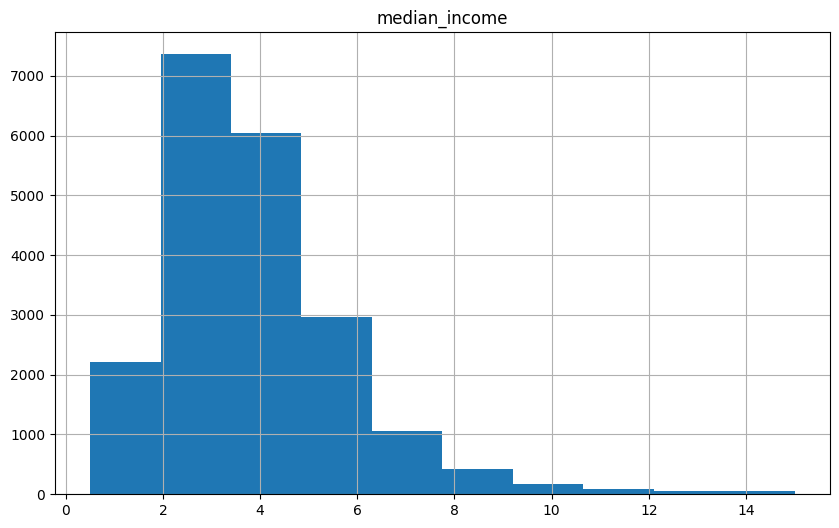

In [ ]:
df[var_quant_continua].hist(figsize=(10,6));

###BoxPlot

In [ ]:
import seaborn as sns

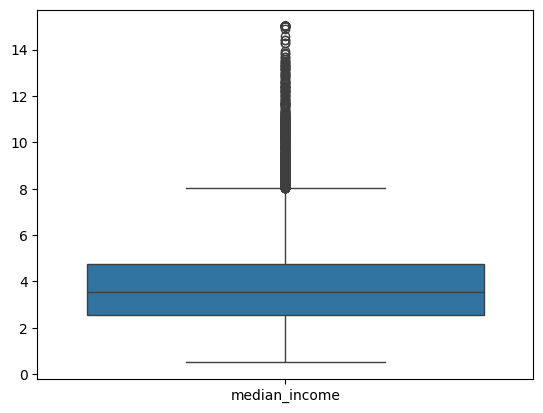

In [ ]:
sns.boxplot(data=df[var_quant_continua]);

###Dispersão

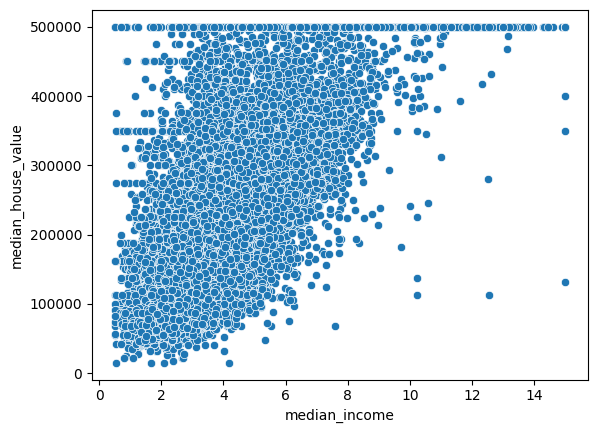

In [ ]:
sns.scatterplot(data=df, x='median_income', y='median_house_value');

##Variáveis quantitativas discretas

In [ ]:
var_quant_discreta

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households']

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import matplotlib as mpl

###housing_median_age

In [ ]:
len(df['housing_median_age'].unique())

52

<Axes: xlabel='housing_median_age'>

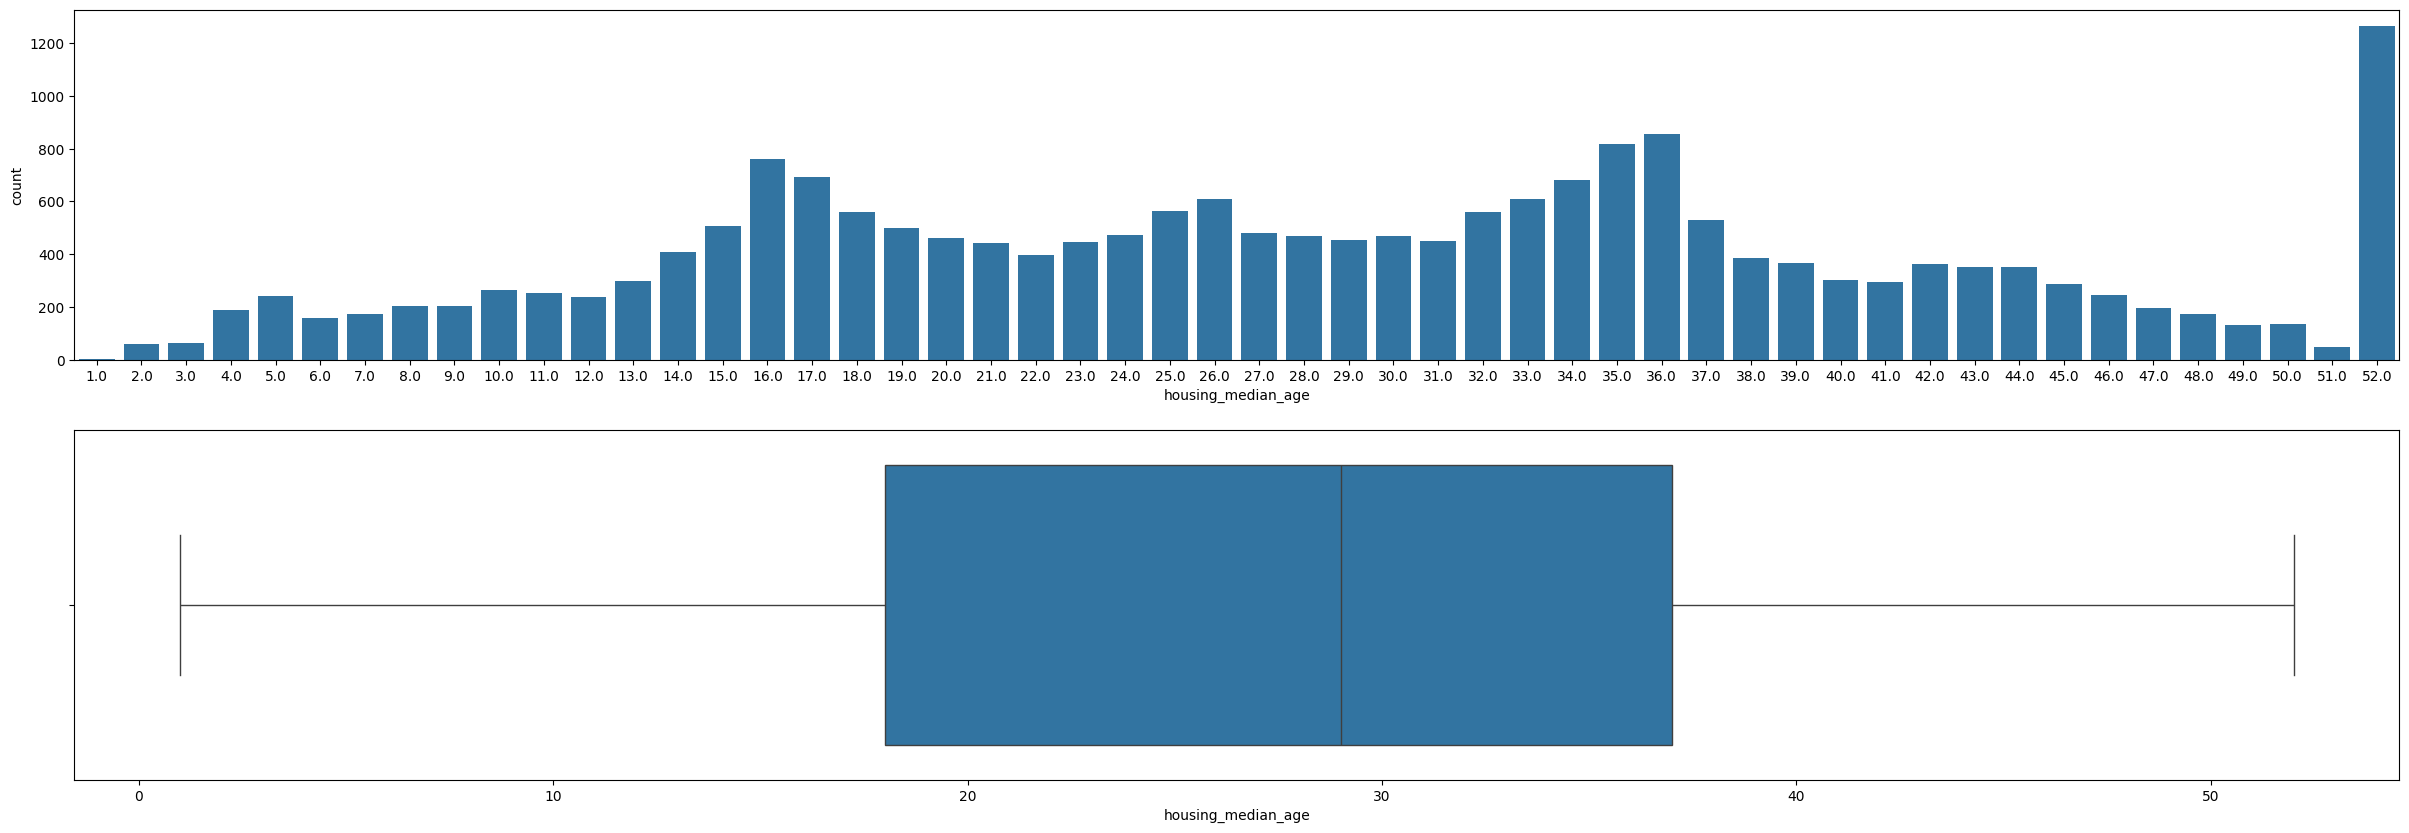

In [ ]:
#Gráfico de barras e BoxPLots:
plt.figure(figsize=(30, 10))

plt.subplot(2, 1, 1)
sns.countplot(data=df, x='housing_median_age')

plt.subplot(2, 1, 2)
sns.boxplot(data=df, x='housing_median_age')

A distribuição de housing_median_age em 52 é estranha. Porque ela a quantidade aumenta tão repentinamente?

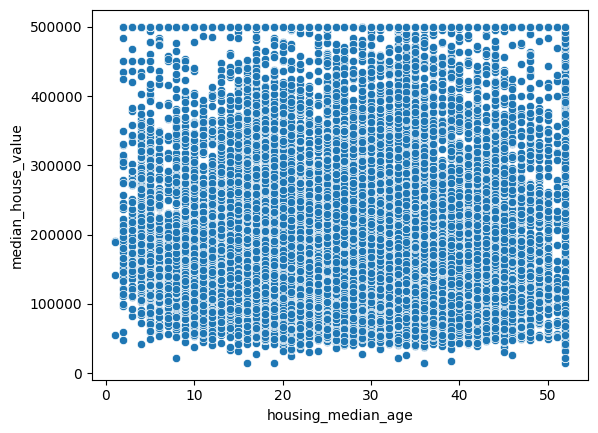

In [ ]:
#Gráfico dispersão:
sns.scatterplot(data=df, x='housing_median_age', y='median_house_value');

###total_rooms

In [ ]:
df['total_rooms'].describe()

,total_rooms
count,20433.000000
mean,2636.504233
std,2185.269567
min,2.000000
25%,1450.000000
50%,2127.000000
75%,3143.000000
max,39320.000000


In [ ]:
df['total_rooms'].value_counts()

,count
total_rooms,
1527.0,18
1582.0,17
1613.0,17
2127.0,16
1607.0,15
...,...
4528.0,1
4357.0,1
57.0,1


<Axes: xlabel='total_rooms'>

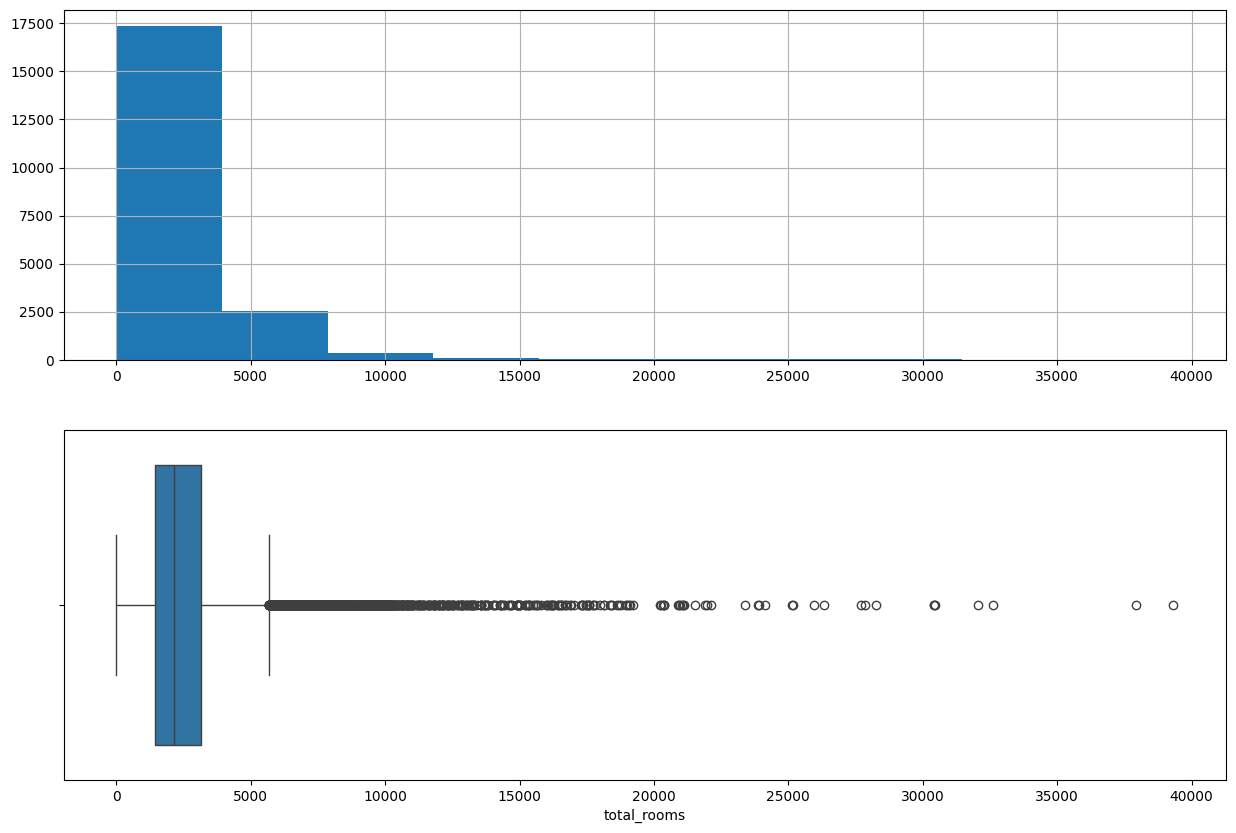

In [ ]:
#Gráfico de barras e BoxPLots - como há muitos valores únicos, utilizaremos o histograma para visualizar a distribuição::
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
df['total_rooms'].hist()

plt.subplot(2, 1, 2)
sns.boxplot(data=df, x='total_rooms')

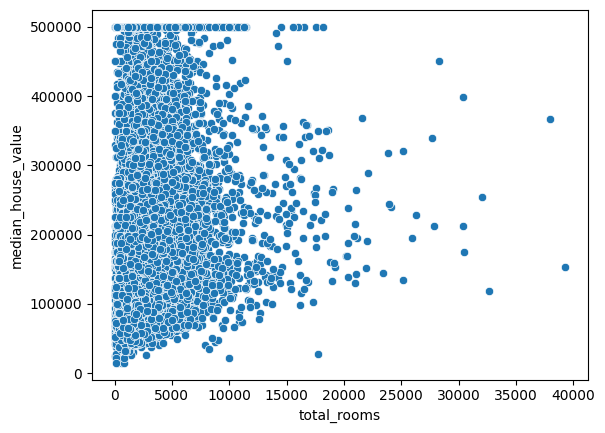

In [ ]:
sns.scatterplot(data=df, x='total_rooms', y='median_house_value');

###total_bedrooms

In [ ]:
df['total_bedrooms'].describe()

,total_bedrooms
count,20433.000000
mean,537.870553
std,421.385070
min,1.000000
25%,296.000000
50%,435.000000
75%,647.000000
max,6445.000000


In [ ]:
len(df['total_bedrooms'].unique())

1923

<Axes: xlabel='total_bedrooms'>

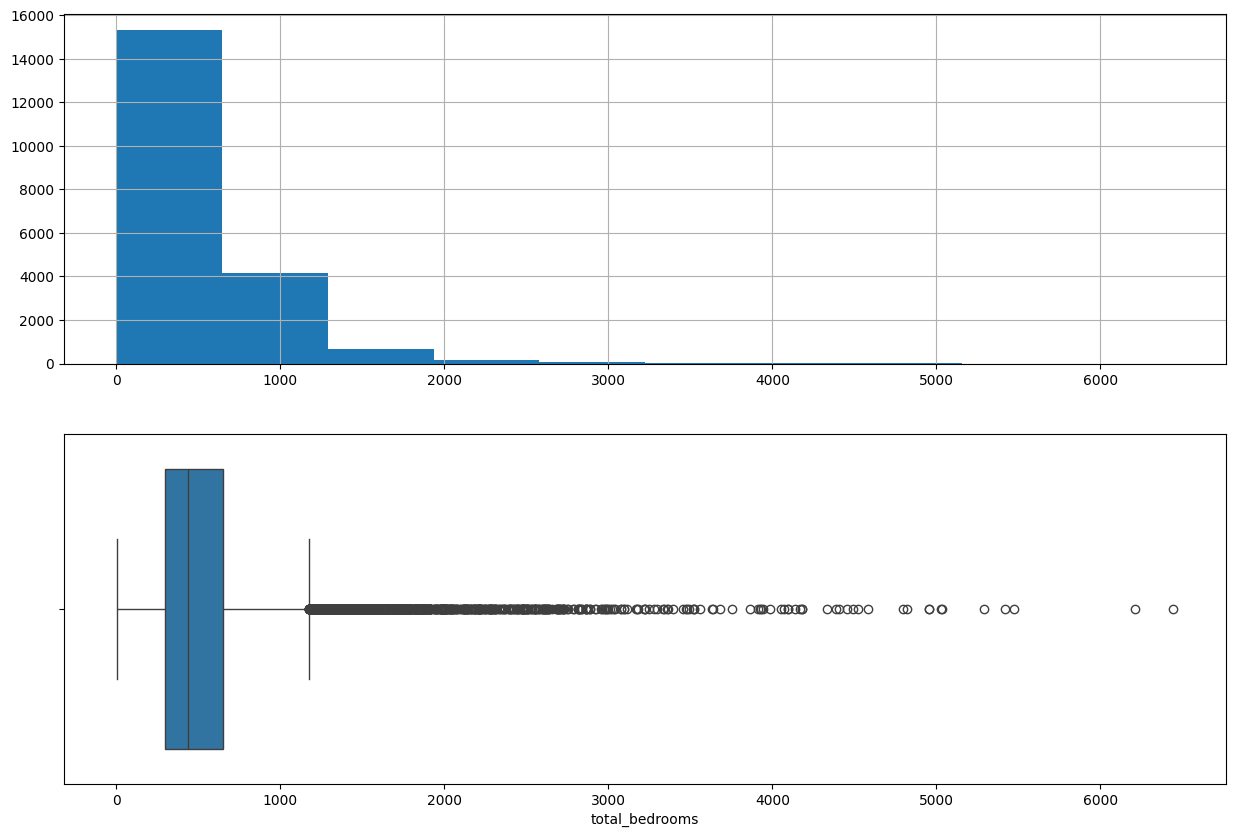

In [ ]:
#Gráfico de barras e BoxPLots - como há muitos valores únicos, utilizaremos o histograma para visualizar a distribuição::
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
df['total_bedrooms'].hist()

plt.subplot(2, 1, 2)
sns.boxplot(data=df, x='total_bedrooms')

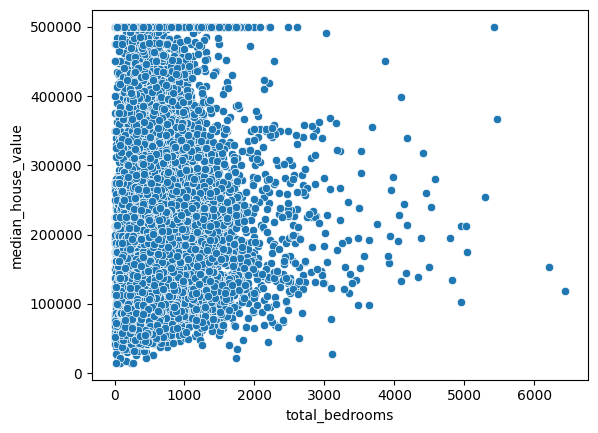

In [ ]:
sns.scatterplot(data=df, x='total_bedrooms', y='median_house_value');

###population

In [ ]:
df['population'].describe()

,population
count,20433.000000
mean,1424.946949
std,1133.208490
min,3.000000
25%,787.000000
50%,1166.000000
75%,1722.000000
max,35682.000000


In [ ]:
len(df['population'].unique())

3879

<Axes: xlabel='population'>

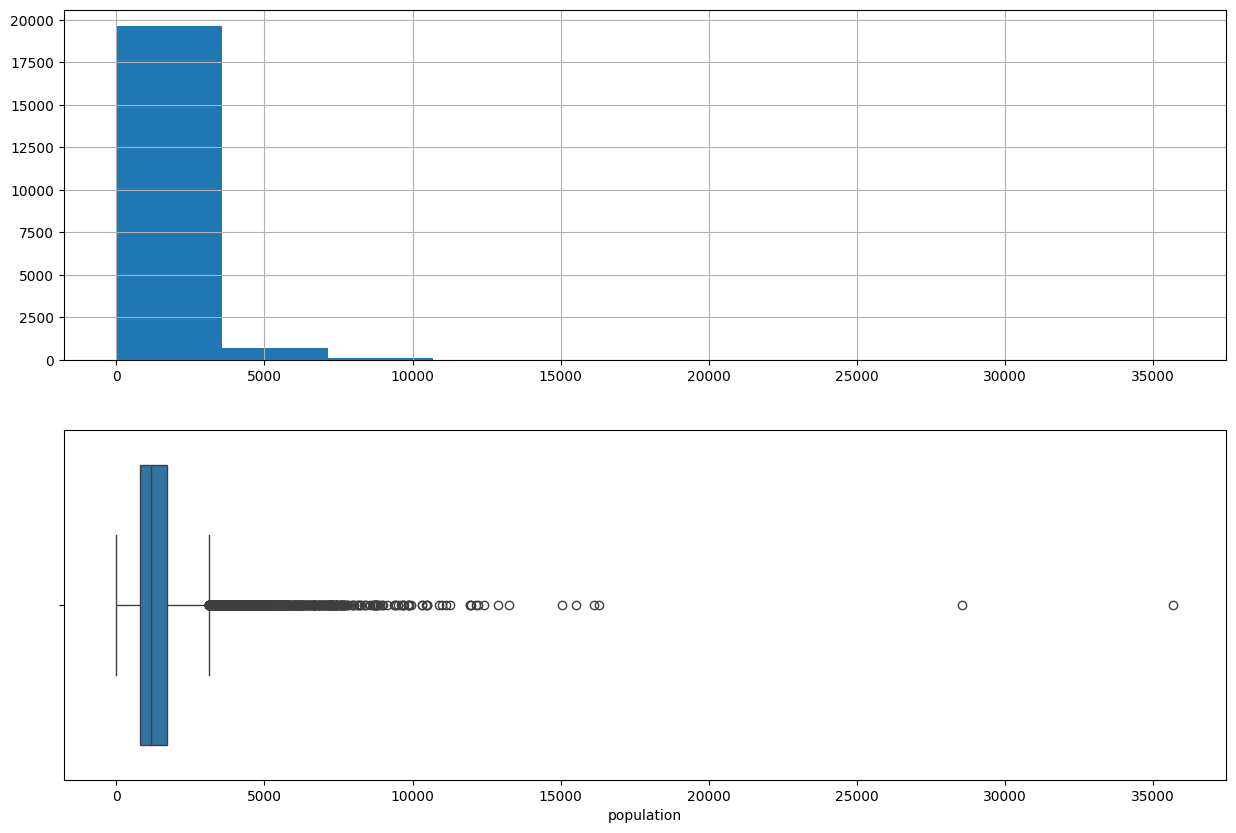

In [ ]:
#Gráfico de barras e BoxPLots - como há muitos valores únicos, utilizaremos o histograma para visualizar a distribuição::
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
df['population'].hist()

plt.subplot(2, 1, 2)
sns.boxplot(data=df, x='population')

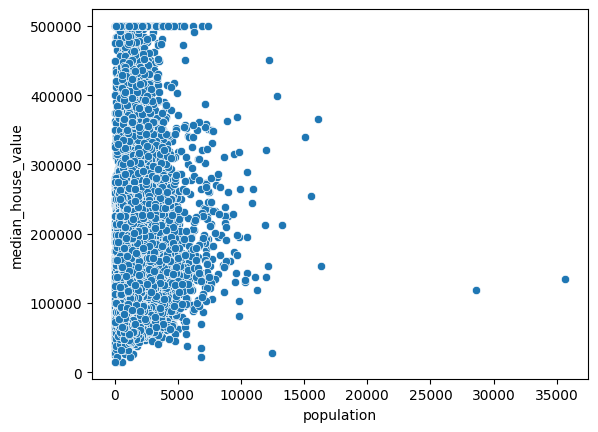

In [ ]:
sns.scatterplot(data=df, x='population', y='median_house_value');

##Variáveis qualitativas ordinais

In [ ]:
var_qual_ord

['ocean_proximity']

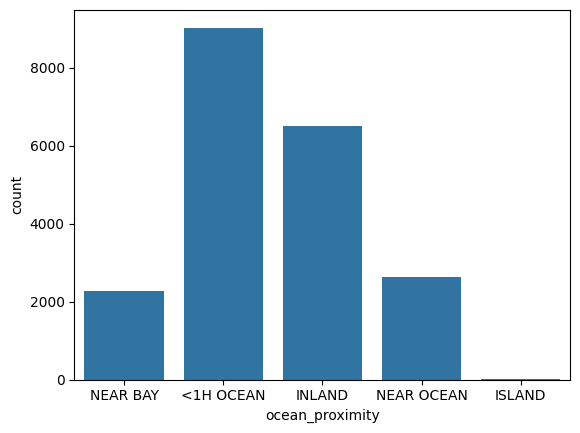

In [ ]:
sns.countplot(data=df, x='ocean_proximity');

##Feature selection

###Correlações

In [ ]:
df_cor = df[var_quant_continua + var_quant_discreta + var_target].copy()

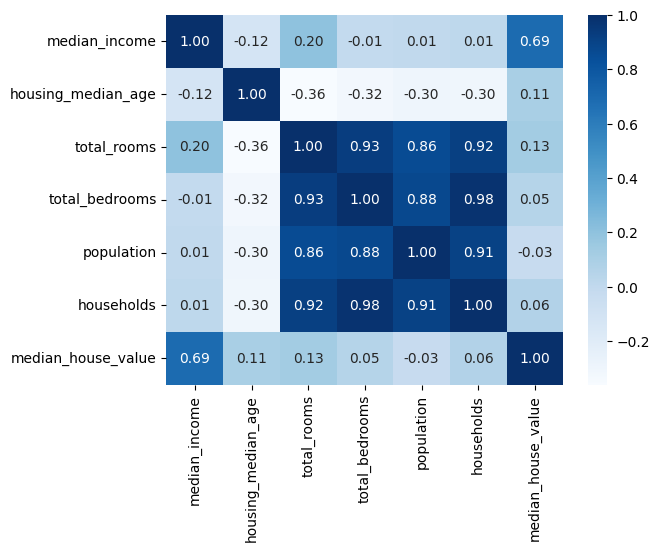

In [ ]:
correlation = df_cor.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='Blues');

Há muitas variáveis multicolineares! Necessário atenção a isso! No entanto, multicolinearidade não é um problema sério para o poder preditivo de modelos baseados em árvores.
Fonte: https://blog.curso-r.com/posts/2018-05-22-arvore-e-multicolinearidade/

###Associações

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
#Criação das listas de features selecionadas e seus respectivos p-valores no teste de associação com a variável target.
selected_features = []
p_values = []

In [ ]:
import numpy as np

In [ ]:
def ana_assoc(df):
  '''
  Essa função irá retornar o resultado do teste qui-quadrado de cada feature com a variável target.
  As variáveis que possuem associação serão adicionadas na lista 'selected_features' e o p_value na lista 'p_values'.
  '''
  for i in df.columns:
    k = 1 + 3.3 * np.log(len(df))
    k = int(k)

    if (df[i].dtype == int) | (df[i].dtype == float):
      #criando faixas:
      df[f'{i}_fx'] = pd.cut(df[i], bins=k, include_lowest = True)
      df[f'SalePrice_fx'] = pd.cut(df['median_house_value'], bins=k, include_lowest = True)

      #Tabela de frequência:
      cross_tab = pd.crosstab(df[f'{i}_fx'], df['SalePrice_fx'])

      #qui-quadrado:
      stat, p, dof, expected = chi2_contingency(cross_tab)

      if p < 0.05:
        print(f'Variável {i} - p_value = {p} <= 0.05 ---> Há associação')
        selected_features.append(i)
        p_values.append(p)

      else:
        print(f'Variável {i} - p_value = {p} > 0.05 ---> Não há associação')

      #drop coluna fx:
      df.drop(columns=[f'{i}_fx', 'SalePrice_fx'], inplace=True)

    else:
      #Criando faixas:
      df[f'SalePrice_fx'] = pd.cut(df['median_house_value'], bins=k, include_lowest = True)

      #Tabela de frequência:
      cross_tab = pd.crosstab(df[i], df['SalePrice_fx'])

      #qui-quadrado:
      stat, p, dof, expected = chi2_contingency(cross_tab)

      if p < 0.05:
        print(f'Variável {i} - p_value = {round(p,10)} <= 0.05 ---> Há associação')
        selected_features.append(i)
        p_values.append(p)

      else:
        print(f'Variável {i} - p_value = {round(p,10)} > 0.05 ---> Não há associação')

      #drop coluna fx:
      df.drop(columns=['SalePrice_fx'], inplace=True)

In [ ]:
#Análise de associação das variáveis com variável target:
ana_assoc(df)

Variável longitude - p_value = 0.0 <= 0.05 ---> Há associação
Variável latitude - p_value = 0.0 <= 0.05 ---> Há associação
Variável housing_median_age - p_value = 9.273739041204545e-88 <= 0.05 ---> Há associação
Variável total_rooms - p_value = 3.698655329031188e-94 <= 0.05 ---> Há associação
Variável total_bedrooms - p_value = 6.39695092369885e-25 <= 0.05 ---> Há associação
Variável population - p_value = 2.3333239643009185e-44 <= 0.05 ---> Há associação
Variável households - p_value = 4.3745935301595075e-30 <= 0.05 ---> Há associação
Variável median_income - p_value = 0.0 <= 0.05 ---> Há associação
Variável median_house_value - p_value = 0.0 <= 0.05 ---> Há associação
Variável ocean_proximity - p_value = 0.0 <= 0.05 ---> Há associação


In [ ]:
#Criação de DataFrame com p_values ordenado em ordem crescente:
df_assoc = pd.DataFrame({'features': selected_features, 'p_values': p_values})
df_assoc.sort_values(by='p_values', ascending=True)

,features,p_values
0,longitude,0.000000e+00
1,latitude,0.000000e+00
7,median_income,0.000000e+00
8,median_house_value,0.000000e+00
9,ocean_proximity,0.000000e+00
3,total_rooms,3.698655e-94
2,housing_median_age,9.273739e-88
5,population,2.333324e-44
6,households,4.374594e-30
4,total_bedrooms,6.396951e-25


####ocean_proximity

#Modelo baseline

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(df.drop(columns=['median_house_value']), df['median_house_value'], test_size=0.2, random_state=42)

In [ ]:
#X_train_base = pd.DataFrame(X_train_base)
#X_test_base = pd.DataFrame(X_test_base)
#y_train_base = pd.DataFrame(y_train_base)
#y_test_base = pd.DataFrame(y_test_base)

##Preprocessamento

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

In [ ]:
#OneHotEncoder - USaando make_column_transformer para selecionarmos as variáveis que queremos aplicar OneHotEncoder:
transformer = make_column_transformer(
    (OneHotEncoder(drop='first', sparse_output=False), ['ocean_proximity']),
    remainder='passthrough',
    sparse_threshold=0
)

#RobustScaler
scaler = RobustScaler(with_centering=False)

##RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Criação pipeline random forest baseline:
pipe_rf = Pipeline([
    ('OneHotEncoder', transformer),
    ('RobustScaler', scaler),
    ('RandomForest', RandomForestRegressor(random_state=42, warm_start=True))
])

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
pipe_rf.fit(X_train_base, y_train_base.values.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['ocean_proximity'])])),
                ('RobustScaler', RobustScaler(with_centering=False)),
                ('RandomForest',
                 RandomForestRegressor(random_state=42, warm_start=True))])

##Desempenho

###Dados treino

In [ ]:
y_pred_baseline_train = pipe_rf.predict(X_train_base)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
import numpy as np

In [ ]:
score_base_train = mean_squared_error(y_train_base, y_pred_baseline_train)
score_base_train = np.sqrt(score_base_train)
print(f'O modelo baseline RandomForest teve RMSE de {round(score_base_train,1)} com os dados de treino')

O modelo baseline RandomForest teve RMSE de 18201.0 com os dados de treino


###Dados teste

In [ ]:
y_pred_baseline_test = pipe_rf.predict(X_test_base)

In [ ]:
score_base_test = mean_squared_error(y_test_base, y_pred_baseline_test)
score_base_test = np.sqrt(score_base_test)
print(f'O modelo baseline RandomForest teve RMSE de {round(score_base_test,1)} com os dados de teste')

O modelo baseline RandomForest teve RMSE de 48747.0 com os dados de teste


Modelo está sobreajustando as dados de treino.

#Modelos

##RandomForest

In [ ]:
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(df.drop(columns=['median_house_value']), df['median_house_value'], test_size=0.2, random_state=42)

In [ ]:
#Parâmetros a serem testados no GridSeaerhc do Random Forest
params_rf = {
    'RandomForest__n_estimators': [100],
    'RandomForest__max_depth': [20, 25, 30],
    'RandomForest__min_samples_leaf': [1, 2, 4],
}

In [ ]:
#Grid Search
gs_rf = GridSearchCV(pipe_rf, params_rf, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)

In [ ]:
gs_rf.fit(X_train_base, y_train_base.values.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          sparse_threshold=0,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['ocean_proximity'])])),
                                       ('RobustScaler',
                                        RobustScaler(with_centering=False)),
                                       ('RandomForest',
                                        RandomForestRegressor(random_state=42,
                                                              warm_start=True))]),
             n_jobs=-1,
             param_grid={'RandomForest__max_depth': [20, 25, 30],
                         'RandomForest__min_samples_leaf': [1, 2, 4],
                         'RandomForest__n_estimators': [100]},
             scoring='neg_root_mean_squared_error')

In [ ]:
gs_rf.best_params_

{'RandomForest__max_depth': 30,
 'RandomForest__min_samples_leaf': 2,
 'RandomForest__n_estimators': 100}

In [ ]:
print(f'O modelo RandomForest teve RMSE de {round(-gs_rf.best_score_,1)} com dados de validação')

O modelo RandomForest teve RMSE de 49808.7 com dados de validação


###Treinamento

In [ ]:
rf_model = gs_rf.best_estimator_
rf_model

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['ocean_proximity'])])),
                ('RobustScaler', RobustScaler(with_centering=False)),
                ('RandomForest',
                 RandomForestRegressor(max_depth=30, min_samples_leaf=2,
                                       random_state=42, warm_start=True))])

In [ ]:
rf_model.fit(X_train_base, y_train_base.values.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:468: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['ocean_proximity'])])),
                ('RobustScaler', RobustScaler(with_centering=False)),
                ('RandomForest',
                 RandomForestRegressor(max_depth=30, min_samples_leaf=2,
                                       random_state=42, warm_start=True))])

###Desempenho

####Dados de treino

In [ ]:
y_pred = rf_model.predict(X_train_base)

In [ ]:
import numpy as np

In [ ]:
score_treino = mean_squared_error(y_train_base, y_pred)
score_treino = np.sqrt(score_treino)
print(f'O modelo RandomForest teve RMSE de {round(score_treino,1)} com os dados de treino')

O modelo RandomForest teve RMSE de 23550.3 com os dados de treino


####Dados de teste

In [ ]:
y_pred_test = rf_model.predict(X_test_base)

In [ ]:
score_teste = mean_squared_error(y_test_base, y_pred_test)
score_teste = np.sqrt(score_teste)
print(f'O modelo RandomForest teve RMSE de {round(score_teste,1)} com os dados de teste')

O modelo RandomForest teve RMSE de 48718.7 com os dados de teste


##XGBoost

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
#Criação pipeline XGBoost:
pipe_xgb = Pipeline([
    ('OneHotEncoder', transformer),
    ('RobustScaler', scaler),
    ('XGBoost', xgb.XGBRegressor(random_state=42, warm_start=True))
])

In [ ]:
params_xgb = {
    'XGBoost__n_estimators': [450, 500],
    'XGBoost__max_depth': [4, 6, 8],
    'XGBoost__learning_rate': [0.12, 0.13, 0.14],
    'XGBoost__lambda': [5, 6, 7], #Estamos otimizando o hiperparâmetro lambda porque sabemos de antemão que o modelo está overfittando.
    'XGBoost__sub_sample': [0.5, 0.6, 0.7] #Subamostragem irá diminuir o overfitting. Essa parâmetro indica a proporção de instâncias que serão usadas na amostragem.
}

In [ ]:
gs_xgb = GridSearchCV(pipe_xgb, params_xgb, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)

In [ ]:
#Treinamento do modelo XGBoost
gs_xgb.fit(X_train_base, y_train_base.values.ravel())

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:32:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "sub_sample", "warm_start" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          sparse_threshold=0,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['ocean_proximity'])])),
                                       ('RobustScaler',
                                        RobustScaler(with_centering=False)),
                                       ('XGBoost',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsa...
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'XGBoost__lambda': [5, 6, 7],
                         'XGBoost__learning_rate': [0.12, 0.13, 0.14],
                         'XGBoost__max_depth': [4, 6, 8],
                         'XGBoost__n_estimators': [450, 500],
                         'XGBoost__sub_sample': [0.5, 0.6, 0.7]},
             scoring='neg_root_mean_squared_error')

In [ ]:
gs_xgb.best_params_

{'XGBoost__lambda': 6,
 'XGBoost__learning_rate': 0.13,
 'XGBoost__max_depth': 6,
 'XGBoost__n_estimators': 500,
 'XGBoost__sub_sample': 0.5}

In [ ]:
print(f'O XGBoost teve um RMESE de {round(-1 * gs_xgb.best_score_,1)} com dados de validação')

O XGBoost teve um RMESE de 46532.4 com dados de validação


###Treinamento

In [ ]:
xg_model = gs_xgb.best_estimator_
xg_model

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['ocean_proximity'])])),
                ('RobustScaler', RobustScaler(with_centering=False)),
                ('XGBoost',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, lambda=6,
                              learning_rate=0.13, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=500, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [ ]:
xg_model.fit(X_train_base, y_train_base.values.ravel())

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:32:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "sub_sample", "warm_start" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['ocean_proximity'])])),
                ('RobustScaler', RobustScaler(with_centering=False)),
                ('XGBoost',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, lambda=6,
                              learning_rate=0.13, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=500, n_jobs=None,
                              num_parallel_tree=None, ...))])

###Desempeho

####Dados de treino

In [ ]:
y_pred_xg_train = xg_model.predict(X_train_base)

In [ ]:
score_xg_train = mean_squared_error(y_train_base, y_pred_xg_train)
score_xg_train = np.sqrt(score_xg_train)
score_xg_train

22541.053010813353

####Dados de teste

In [ ]:
y_pred_xg_test = xg_model.predict(X_test_base)

In [ ]:
score_xg_test = mean_squared_error(y_test_base, y_pred_xg_test)
score_xg_test = np.sqrt(score_xg_test)
score_xg_test

46408.34529126166

##LightGBM

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
#Criação pipeline LightGBM:
pipe_lgb = Pipeline([
    ('OneHotEncoder', transformer),
    ('RobustScaler', scaler),
    ('LightGBM', lgb.LGBMRegressor(random_state=42, warm_start=True)),
])

In [ ]:
params_lgb = {
    'LightGBM__n_estimators': [300, 400],
    'LightGBM__max_depth': [10, 12, 14],
    'LightGBM__learning_rate': [0.09, 0.1, 0.11],
    'LightGBM__lambda': [2, 3, 4] #Estamos otimizando o hiperparâmetro lambda porque sabemos de antemão que o modelo está overfittando.
}

In [ ]:
gs_lgb = GridSearchCV(pipe_lgb, params_lgb, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)

In [ ]:
gs_lgb.fit(X_train_base, y_train_base.values.ravel())

[LightGBM] [Warning] Unknown parameter: warm_start
[LightGBM] [Warning] lambda_l2 is set with lambda=3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3
[LightGBM] [Warning] Unknown parameter: warm_start
[LightGBM] [Warning] lambda_l2 is set with lambda=3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001572 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1844
[LightGBM] [Info] Number of data points in the train set: 16346, number of used features: 11
[LightGBM] [Info] Start training from score 206644.400098


/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          sparse_threshold=0,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['ocean_proximity'])])),
                                       ('RobustScaler',
                                        RobustScaler(with_centering=False)),
                                       ('LightGBM',
                                        LGBMRegressor(random_state=42,
                                                      warm_start=True))]),
             n_jobs=-1,
             param_grid={'LightGBM__lambda': [2, 3, 4],
                         'LightGBM__learning_rate': [0.09, 0.1, 0.11],
                         'LightGBM__max_depth': [10, 12, 14],
                         'LightGBM__n_estimators': [300, 400]},
             scoring='neg_root_mean_squared_error')

In [ ]:
print(f'O modelo LightGBM teve RMSE de {round(-1 * gs_lgb.best_score_, 1)} com dados de validação.')

O modelo LightGBM teve RMSE de 46497.2 com dados de validação.


In [ ]:
gs_lgb.best_params_

{'LightGBM__lambda': 3,
 'LightGBM__learning_rate': 0.1,
 'LightGBM__max_depth': 12,
 'LightGBM__n_estimators': 400}

##Melhor modelo

In [ ]:
models_scores = {'Random Forest': -1*gs_rf.best_score_, 'XGBoost': -1*gs_xgb.best_score_, 'LightGBM': -1*gs_lgb.best_score_}

In [ ]:
models_scores

{'Random Forest': 49808.701693818315,
 'XGBoost': 46532.42356746489,
 'LightGBM': 46497.17083356448}

In [ ]:
best_model = min(models_scores, key=models_scores.get)

In [ ]:
print(f'O melhor modelo é o: {best_model}!')

O melhor modelo é o: LightGBM!


In [ ]:
import joblib

In [ ]:
joblib.dump(gs_lgb.best_estimator_, 'lightgbm_best_model.pkl')

['lightgbm_best_model.pkl']